In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians

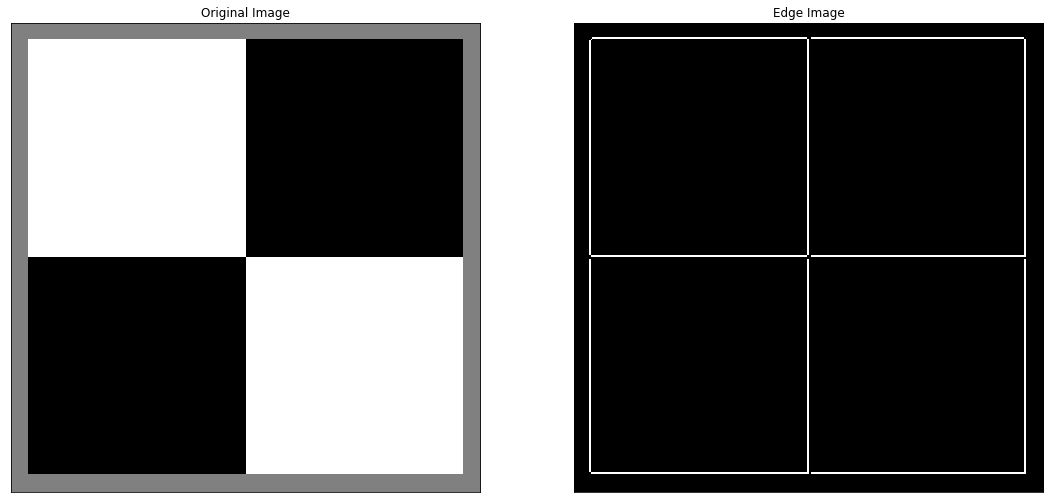

In [20]:
#task 1

img = cv2.imread('input/ps1-input0.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200)

def draw_two_images(img1, title1, img2,  title2):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.subplot(121),plt.imshow(img1,cmap = 'gray')
    plt.title(title1), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2,cmap = 'gray')
    plt.title(title2), plt.xticks([]), plt.yticks([])
    plt.show()
    
def draw_grayscale(img):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img, cmap='gray')
    plt.show()
    
def draw_image(img):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img)
    plt.show() 

draw_two_images(img, 'Original Image', edges, 'Edge Image')

(116, 0)
(608, 90)
(234, 0)
(490, 90)
(353, 0)
(371, 90)


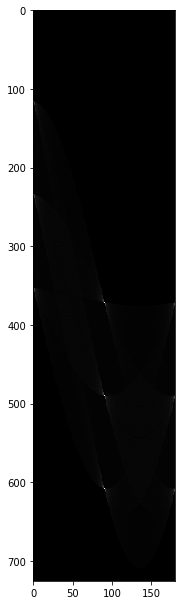

line: (245, 0) (245, 256)
line: (8, 0) (8, 256)
line: (0, 246) (256, 246)
line: (127, 0) (127, 256)
line: (0, 128) (256, 128)
line: (0, 9) (256, 9)


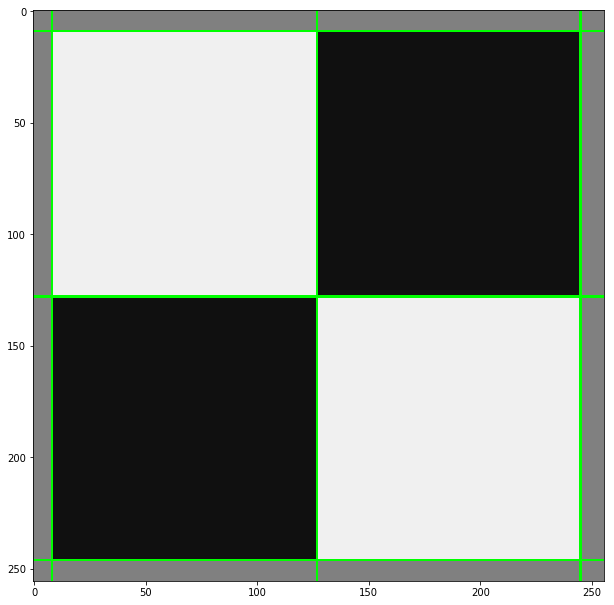

In [4]:
# task2

def find_lines(edges, num_lines, close_angle=10, close_dist=10):
    theta_bins = 180
    d_bins = int(2 + 2*(edges.shape[0] ** 2 + edges.shape[1] ** 2) ** 0.5)
    acc = np.zeros((d_bins, theta_bins))

    def bin_to_theta(bin): return (bin / theta_bins - 0.5) * 180.0
    def bin_to_d(bin): return bin - int(edges.shape[0]**2 + edges.shape[1]**2)**0.5
    def d_to_bin(d): return d + int((edges.shape[0]**2 + edges.shape[1]**2)**0.5)
    
    
    for y, x in np.transpose(np.nonzero(edges)):
        for theta in range(theta_bins):
            t = bin_to_theta(theta)

            c = cos(radians(t))
            s = sin(radians(t))
            d = int(round(c * (x + 1) + s * (y + 1)))

            dbin = d_to_bin(d) 
            acc[dbin, theta] += 1

    peaks = set()
    for i in range(num_lines):
        largest = 0
        largest_ind = (-1,-1)
        for x in range(acc.shape[0]):
            for y in range(acc.shape[1]):
                theta = bin_to_theta(y)
                d = bin_to_d(x)
                if acc[x,y] <= largest: continue
                close_to_peak = False
                for p in peaks:
                    tp = bin_to_theta(p[1])
                    dp = bin_to_d(p[0])
                    
                    if min(abs(dp - d), abs(dp + d)) < close_dist and min(abs(theta - tp), abs(theta - 180 - tp)) < close_angle:
                        close_to_peak = True
                        break
                if not close_to_peak:
                    largest = acc[x,y]
                    largest_ind = (x, y)
        if largest > 0:
            print(largest_ind)
            peaks.add(largest_ind)
    
    peaks = [(bin_to_d(x), radians(bin_to_theta(y))) for (x,y) in peaks]
    
    return peaks, acc



def draw_lines(img, peaks):
    for d, theta in peaks:
        c = cos(theta)
        s = sin(theta)
        
        def xfromy(y):
            return (d - y * s) / c

        def yfromx(x):
            return (d - x * c) / s
        
        if (abs(c) > abs(s)):
            p1 = (int(xfromy(0)), 0)
            p2 = (int(xfromy(img.shape[0])), img.shape[0])
        else:
            p1 = (0, int(yfromx(0)))
            p2 = (img.shape[1], int(yfromx(img.shape[1])))
        print("line: {} {}".format(p1, p2))
        cv2.line(img, p1, p2, (0,255,0))
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img)
    plt.show()

def task2():
    peaks, acc = find_lines(edges, 6)

    # show accumulator array
    draw_grayscale(acc)

    img1 = cv2.imread('input/ps1-input0.png')
    draw_lines(img1, peaks)

task2()

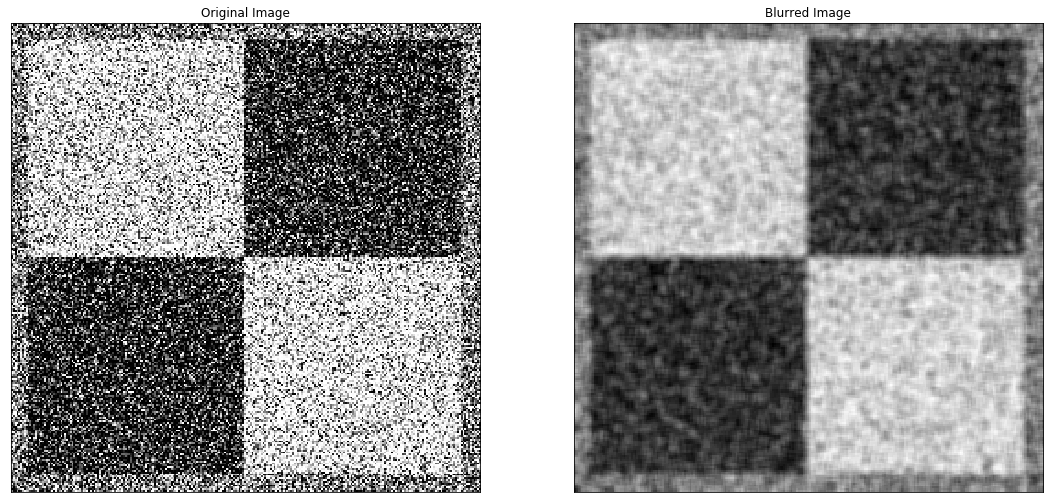

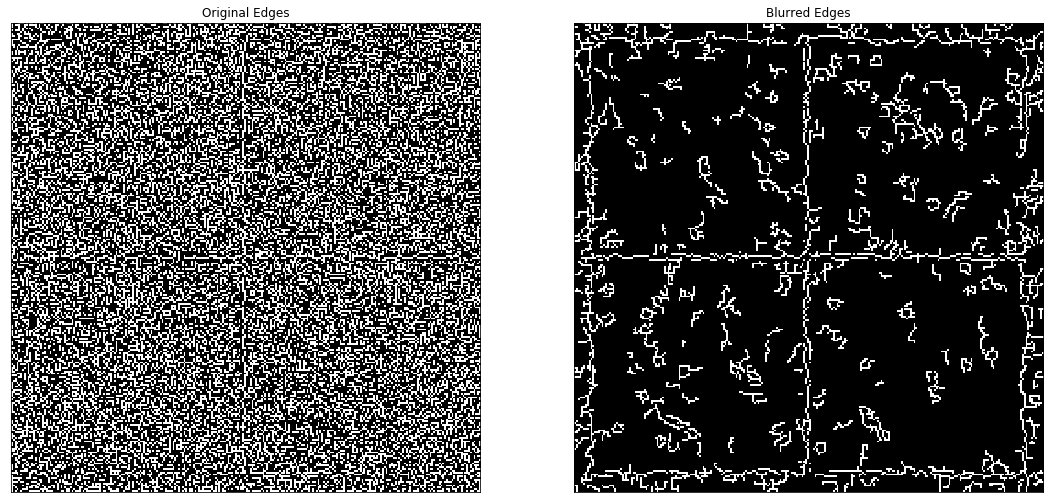

(490, 90)
(117, 0)
(371, 90)
(236, 1)
(609, 90)
(353, 0)
[(-126.03867196751236, -1.5533430342749532), (-245.03867196751236, -1.5707963267948966), (246.96132803248764, 0.0), (8.961328032487643, 0.0), (127.96132803248764, 0.0), (-9.038671967512357, -1.5707963267948966)]


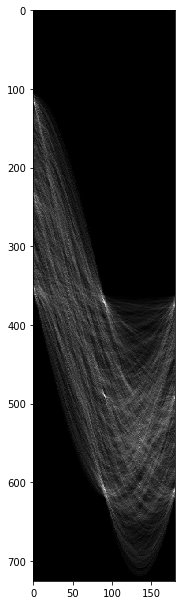

line: (0, 126) (256, 130)
line: (0, 245) (256, 245)
line: (246, 0) (246, 256)
line: (8, 0) (8, 256)
line: (127, 0) (127, 256)
line: (0, 9) (256, 9)


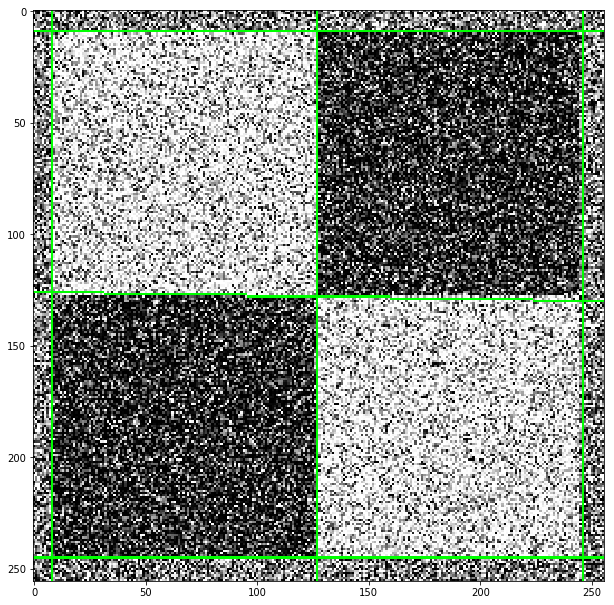

In [5]:
# task 3
def task3():
    img = cv2.imread('input/ps1-input0-noise.png', cv2.IMREAD_GRAYSCALE)
    img_filtered = cv2.GaussianBlur(img, (5,5), 3)

    edges = cv2.Canny(img,100,200)
    edges_filtered = cv2.Canny(img_filtered,100,200)

    draw_two_images(img, 'Original Image', img_filtered, 'Blurred Image')
    draw_two_images(edges, 'Original Edges', edges_filtered, 'Blurred Edges')
    
    peaks, acc = find_lines(edges_filtered, 6)
    print(peaks)
    # show accumulator array
    draw_grayscale(acc)

    img1 = cv2.imread('input/ps1-input0-noise.png')
    draw_lines(img1, peaks)
    
task3()

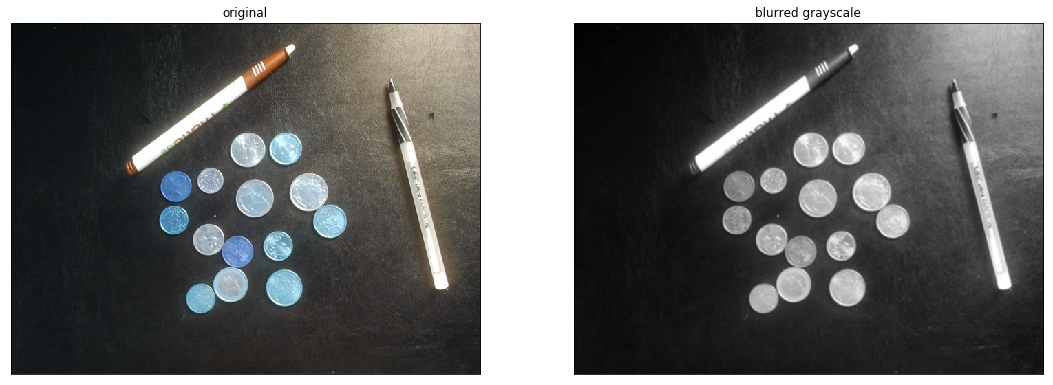

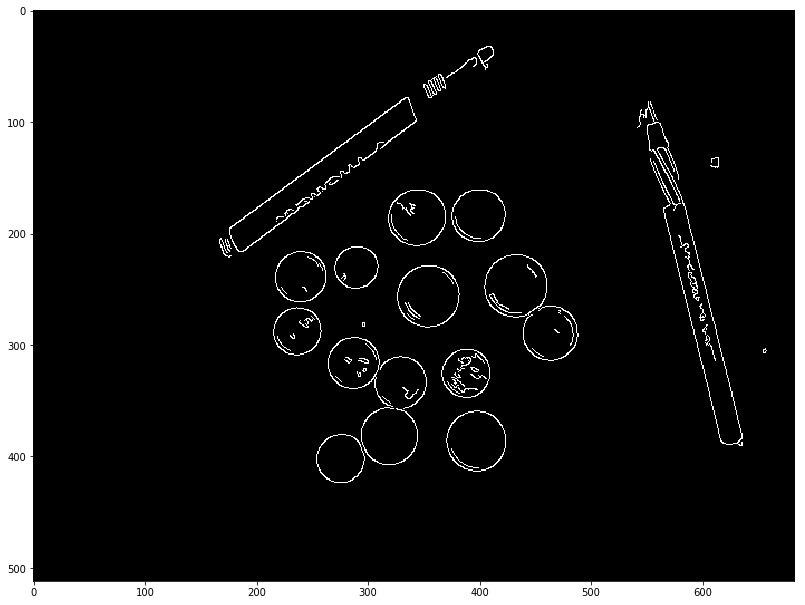

(1378, 76)
(1117, 143)
(1140, 143)
(1358, 76)
[(504.39997656982223, -0.24434609527920614), (286.39997656982223, 0.9250245035569945), (263.39997656982223, 0.9250245035569945), (524.3999765698222, -0.24434609527920614)]


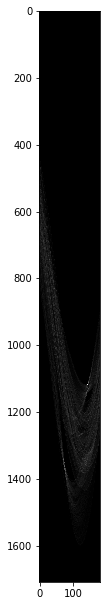

line: (519, 0) (647, 512)
line: (0, 358) (683, -156)
line: (0, 329) (683, -184)
line: (540, 0) (668, 512)


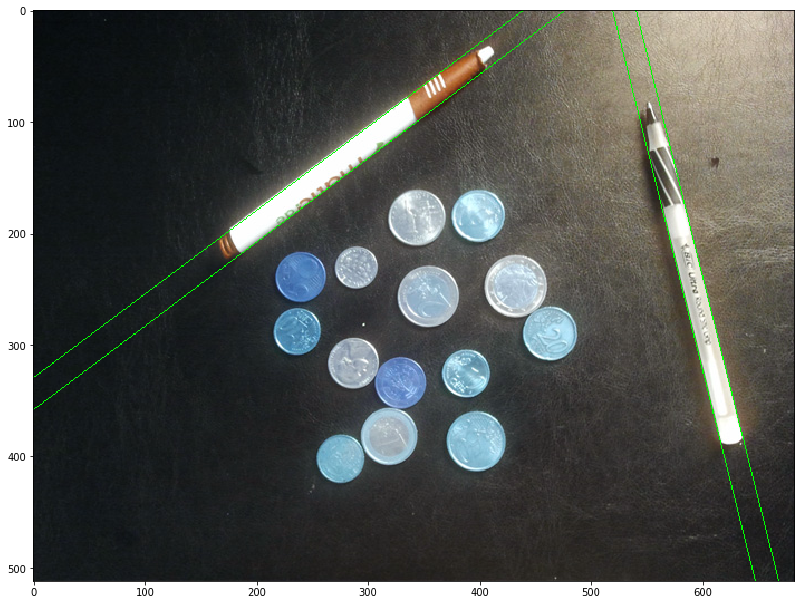

In [6]:
# task 4

def task4():
    img = cv2.imread('input/ps1-input1.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_filtered = cv2.GaussianBlur(gray, (3,3), 1)
    
    draw_two_images(img, 'original', gray_filtered, "blurred grayscale")

    edges = cv2.Canny(gray_filtered,100,200)
    draw_grayscale(edges)
    
    peaks, acc = find_lines(edges, num_lines=4)
    print(peaks)
    draw_grayscale(acc)
    cv2.imwrite("tmp.png", acc)
    draw_lines(img, peaks)
task4()

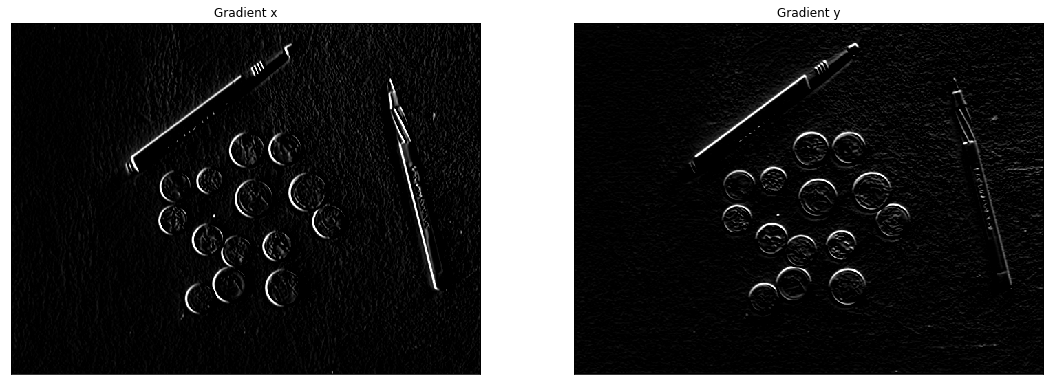

In [ ]:
# task 5


def find_circles(edges, grad_x, grad_y, num_circles, min_radius=10, max_radius=50, close_centers_dist=30, close_radii_dist=30):    
    x_bins = edges.shape[1]
    y_bins = edges.shape[0]
    r_bins = max_radius - min_radius + 1 # radiuses from 
    
    acc = np.zeros((x_bins, y_bins, r_bins))
    
    def r_to_bin(r): return r - min_radius
    def bin_to_r(r): return r + min_radius
    
    for y, x in np.transpose(np.nonzero(edges)):
        gx = grad_x[y,x]
        gy = grad_y[y,x]
        grad = np.linalg.norm([gx, gy])
        if edges[y, x] == 0 or grad == 0: continue
        
        c = gx / np.linalg.norm([gx, gy])
        s = gy / np.linalg.norm([gx, gy])
        for sign in (-1, 1):
            for r in range(min_radius, max_radius + 1):
                x1 = int(x + r * c * sign)
                y1 = int(y + r * s * sign)
                if x1 < edges.shape[1] and x1 >= 0 and y1 < edges.shape[0] and y1 >= 0:
                    acc[x1, y1, r_to_bin(r)] += 1
                

    peaks = set()
    for i in range(num_circles):
        largest = 0
        largest_ind = (-1,-1)
        for y in range(acc.shape[1]):
            for x in range(acc.shape[0]):
                for r_bin in range(acc.shape[2]):
                    r = bin_to_r(r_bin)
                    normalized_value = acc[x,y, r_bin]
                    
                    if normalized_value <= largest: continue
                    for p in peaks:
                        xp = p[0]
                        yp = p[1]
                        rp = bin_to_r(p[2])

                        if np.linalg.norm([x - xp, y - yp]) < close_centers_dist and abs(r - rp) < close_radii_dist:
                            break
                    else:
                        largest = normalized_value
                        largest_ind = (x,y,r_bin)
        if largest > 0: # np.pi * bin_to_r(largest_ind[2]):
            peaks.add(largest_ind)
    
    print("peaks = ", peaks)
    peaks = [(x, y, bin_to_r(r)) for (x,y,r) in peaks]
    
    return peaks, acc


def draw_circles(img, peaks):
    for x,y,r in peaks:
         cv2.circle(img, (x,y), r, (255,0,0))
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img)
    plt.show()

def task5():
    img = cv2.imread('input/ps1-input1.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_filtered = cv2.GaussianBlur(gray, (3,3), 0)
    edges = cv2.Canny(gray_filtered,100,200)
    
    grad_x = cv2.Sobel(gray_filtered, -1, 1, 0)
    grad_y = cv2.Sobel(gray_filtered, -1, 0, 1)
    
    
    draw_two_images(grad_x, 'Gradient x', grad_y, "Gradient y")
    
    peaks, acc = find_circles(edges, grad_x, grad_y, 13)
    
    draw_grayscale(acc[:,:,20])
    
    #blend = cv2.addWeighted(img,0.5,cv2.cvtColor(np.reshape(acc[:,:,20], ((512, 683))).astype(float) , cv2.COLOR_GRAY2BGR),0.5,0)
    #draw_image(blend)
    draw_circles(img, peaks)

task5()

In [52]:
np.pi

3.141592653589793

In [55]:
4/3

1.3333333333333333